Importing Data


In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Random stuff

In [ ]:
data_dir = 'Data'
data_arr_all = []
for i in os.listdir(os.path.join(data_dir)):
    for ii in os.listdir(os.path.join(data_dir, i)):
        print(os.path.join(data_dir, i, ii))
        data_arr_all.append(os.path.join(data_dir, i, ii))

In [ ]:
# Shuffle Data
np.random.shuffle(data_arr_all)

In [ ]:
print(data_arr_all)

In [ ]:
# Divide data into train, test and cross validation
train_data = data_arr_all[:int(len(data_arr_all)*0.7)]
cross_validation_data = data_arr_all[int(len(data_arr_all)*0.7):int(len(data_arr_all)*0.85)]
test_data = data_arr_all[int(len(data_arr_all)*0.85):]
print(train_data)
print(cross_validation_data)
print(test_data)


In [ ]:
for i in train_data:
    print(i, end=' ')
    print(cv2.imread(i).shape)
    plt.imshow(cv2.imread(i))
    plt.show()


Loading Data


In [22]:
data = tf.keras.utils.image_dataset_from_directory("Data")
data_iterator = data.as_numpy_iterator()
counter = 0
counter2 = 0


Found 253 files belonging to 2 classes.


In [ ]:
batch = data_iterator.next()
counter+=1
print(batch[0].shape, batch[1])


In [ ]:
batch2 = data_iterator.next()
counter2+=1
print(batch2[0].shape, batch2[1])


In [ ]:
print(counter, counter2) 
print(batch[0].max(), batch[0].min())

In [ ]:
fig, ax = plt.subplots(ncols = 5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data.as_numpy_iterator().next()

Scaling Data


In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_batch = data.as_numpy_iterator().next()

In [ ]:
fig, ax = plt.subplots(ncols = 5, figsize=(20,20))
for idx, img in enumerate(scaled_batch[0][:5]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(scaled_batch[1][idx])

Distributing data

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
print(train_size+val_size+test_size, train_size, val_size, test_size, len(data))

8 5 2 1 8


In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(12, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [19]:
logdir = "logs"

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 5s 800ms/step - loss: 0.5828 - accuracy: 0.6812 - val_loss: 0.4871 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 4s 753ms/step - loss: 0.4239 - accuracy: 0.8188 - val_loss: 0.4954 - val_accuracy: 0.7969
Epoch 3/20
5/5 [==============================] - 4s 730ms/step - loss: 0.4498 - accuracy: 0.8062 - val_loss: 0.4342 - val_accuracy: 0.8125
Epoch 4/20
5/5 [==============================] - 4s 748ms/step - loss: 0.3863 - accuracy: 0.8375 - val_loss: 0.3155 - val_accuracy: 0.8906
Epoch 5/20
5/5 [==============================] - 4s 750ms/step - loss: 0.3378 - accuracy: 0.8562 - val_loss: 0.3011 - val_accuracy: 0.8906
Epoch 6/20
5/5 [==============================] - 4s 717ms/step - loss: 0.3143 - accuracy: 0.8625 - val_loss: 0.1827 - val_accuracy: 0.9844
Epoch 7/20
5/5 [==============================] - 4s 723ms/step - loss: 0.2329 - accuracy: 0.9375 - val_loss: 0.1617 - val_accuracy: 0.9531
Epoch 8/20
5/5 [====

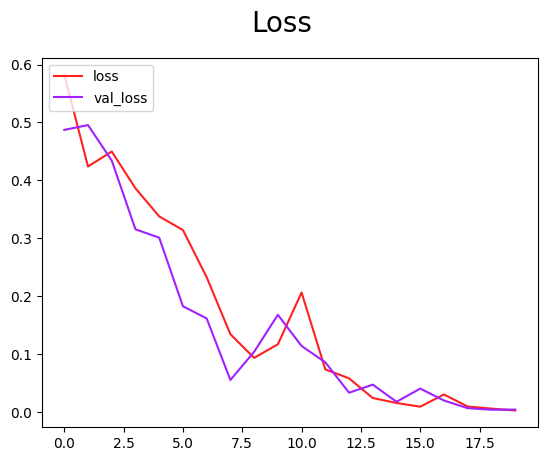

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='#FF2020', label='loss')
plt.plot(hist.history['val_loss'], color='#A120FF', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

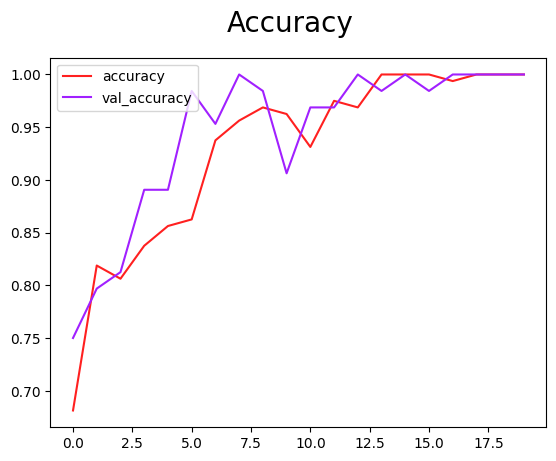

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='#FF2020', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='#A120FF', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator():
    pre.update_state(batch[1], model.predict(batch[0]))
    rec.update_state(batch[1], model.predict(batch[0]))
    acc.update_state(batch[1], model.predict(batch[0]))

1/1 [==============================] - 0s 191ms/step


In [59]:
print("Precision: ", pre.result().numpy())
print("Recall: ", rec.result().numpy())
print("Accuracy: ", acc.result().numpy())

Precision:  1.0
Recall:  1.0
Accuracy:  1.0


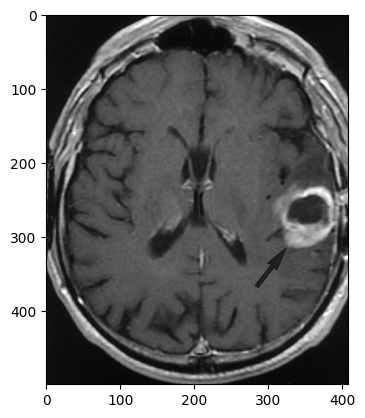

In [81]:
img = cv2.imread('Random test/radiol.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

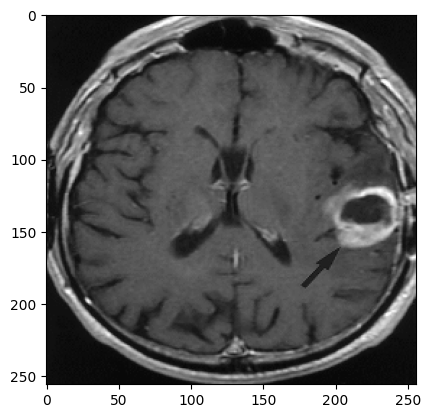

In [82]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

1/1 [==============================] - 0s 26ms/step
[[0.7477853]]


In [ ]:
tf.keras.layers.Dropout??